Trying out Tpot
========

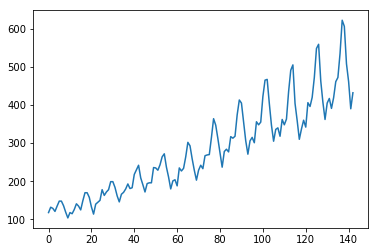

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
dataframe = pd.read_csv('international-airline-passengers.csv', usecols=[1])

plt.plot(dataframe)
plt.show()

Predicting airline passengers over time is a regression problem, rather than a classification problem

### Creating the datasets

In [8]:
np.random.seed(39)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalizing the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train / test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# create dataset matrix
def create_dataset(dataset, lookback=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - lookback - 1):
        a = dataset[i:i+lookback,0]
        dataX.append(a)
        dataY.append(dataset[i+lookback,0])
    return np.array(dataX), np.array(dataY)

lookback = 2

trainX, trainY = create_dataset(train, lookback)
testX, testY = create_dataset(test, lookback)



### Running a TPOT regressor with basic parameters

In [9]:
from tpot import TPOTRegressor

# Decide between Classifier and Regressor - the passenger numbers predition is a 'regression' problem
pipeline_optimizer = TPOTRegressor(generations=8, population_size=25, verbosity=2)
pipeline_optimizer.fit(trainX, trainY)

print(pipeline_optimizer.score(testX, testY))
pipeline_optimizer.export('tpot_airline_passengers_pipeline.py')

Optimization Progress:  22%|██▏       | 50/225 [00:07<00:31,  5.58pipeline/s]

Generation 1 - Current best internal CV score: 0.00198508634879588


Optimization Progress:  33%|███▎      | 75/225 [00:12<00:20,  7.21pipeline/s]

Generation 2 - Current best internal CV score: 0.0019826842009854862


Optimization Progress:  44%|████▍     | 100/225 [00:14<00:12,  9.88pipeline/s]

Generation 3 - Current best internal CV score: 0.0019826842009854862


Optimization Progress:  56%|█████▌    | 125/225 [00:17<00:09, 10.04pipeline/s]

Generation 4 - Current best internal CV score: 0.0019826842009854862


Optimization Progress:  67%|██████▋   | 150/225 [00:25<00:15,  4.77pipeline/s]

Generation 5 - Current best internal CV score: 0.0019826842009854862


Optimization Progress:  78%|███████▊  | 175/225 [00:29<00:06,  7.27pipeline/s]

Generation 6 - Current best internal CV score: 0.0019826842009854862


Optimization Progress:  89%|████████▉ | 200/225 [00:33<00:04,  5.48pipeline/s]

Generation 7 - Current best internal CV score: 0.001982684200985486


Generation 8 - Current best internal CV score: 0.001982684200985486

Best pipeline: ElasticNetCV(MinMaxScaler(StandardScaler(input_matrix)), ElasticNetCV__l1_ratio=0.15, ElasticNetCV__tol=0.0001)
0.00800321405633


Looks like the best pipeline is ElasticNetCV(MinMaxScaler(StandardScaler(input_matrix)), ElasticNetCV__l1_ratio=0.15, ElasticNetCV__tol=0.0001).  This looks very interesting as a starting point for finding a good algorithm for a problem. (It is probably more useful for more complex data problems - this one is a very basic example, just to try it out).